In [1]:
!pip install petroeval

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# from pathlib import Path

# import lasio
import petroeval as pet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as sklm

In [2]:
las = pet.read_lasio(r"../data/train_wells/ataga 05.las")
test_df = las.df()

In [3]:
test_df.head()

,CALI,DT,GR,ILD,LLS,MSFL,NPHI,RHOB,SP,DEPT_1,...,PHID_ATAGA,PHIDF_ATAGA,VSHF,PHIE_ATAGA,NTG,F_ATAGA,SWIRR_ATAGA,SW_ATAGA,PERM_ATAGA,PERM_EFF_ATAGA
DEPT,,,,,,,,,,,,,,,,,,,,,
4347.5,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.919998,1325.118042,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4348.0,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.925201,1325.270386,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4348.5,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.930397,1325.422852,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4349.0,NaN,NaN,77.943199,NaN,NaN,NaN,NaN,NaN,88.969498,1325.575195,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN
4349.5,NaN,NaN,77.943199,-0.0569,NaN,NaN,NaN,NaN,89.614197,1325.727539,...,NaN,NaN,0.227323,NaN,0.772677,NaN,NaN,NaN,NaN,NaN


In [4]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr=""),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="")],
 'Well': [HeaderItem(mnemonic="STRT", unit="ft", value="4347.5", descr=""),
  HeaderItem(mnemonic="STOP", unit="ft", value="14356.0", descr=""),
  HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr=""),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr=""),
  HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="ATAGA 5", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="SRVC", unit="", value="", descr="SERVICE COMPANY"),
  HeaderItem(mnemonic="DATE", unit="", value="2023-11-26 20:43:57   : Log Expo...),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="ATG05", descr="UNIQUE WELL ID"),
  HeaderItem

In [5]:
test_df.FLUIDTYPES.value_counts()/test_df.shape[0]

3.0    0.671246
2.0    0.174443
1.0    0.153262
Name: FLUIDTYPES, dtype: float64

In [6]:
test_df.isna().sum()/test_df.shape[0]

CALI               0.695474
DT                 0.869917
GR                 0.000000
ILD                0.051554
LLS                0.960985
MSFL               0.960735
NPHI               0.682086
RHOB               0.669947
SP                 0.050904
DEPT_1             0.000000
ATAGA_LITHOLOGY    0.000000
FLUIDTYPES         0.001049
IGR                0.000000
VSH                0.000000
FL                 0.000000
PHID_ATAGA         0.669947
PHIDF_ATAGA        0.669947
VSHF               0.000000
PHIE_ATAGA         0.669947
NTG                0.000000
F_ATAGA            0.669947
SWIRR_ATAGA        0.669947
SW_ATAGA           0.052802
PERM_ATAGA         0.669947
PERM_EFF_ATAGA     0.669947
dtype: float64

In [7]:
las1 = pet.read_lasio("../data/train_wells/ataga 07.las")
las2 = pet.read_lasio("../data/train_wells/ataga 10.las")
las3 = pet.read_lasio("../data/train_wells/ataga 11.las")
train_df1 = las1.df()
train_df2 = las2.df()
train_df3 = las3.df()

In [8]:
train_df1 = train_df1[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]
train_df2 = train_df2[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]
train_df3 = train_df3[["GR", "RHOB", "ILD", "SP", "NPHI", "FLUIDTYPES"]]

In [9]:
train_df = pd.concat((train_df1, train_df2, train_df3))
train_df.isna().sum()/train_df.shape[0]

GR            0.350275
RHOB          0.512299
ILD           0.328887
SP            0.059084
NPHI          0.547817
FLUIDTYPES    0.149588
dtype: float64

In [10]:
train_df.shape

(61997, 6)

In [11]:
train_df.dropna(subset=['FLUIDTYPES'], inplace=True)

In [12]:
train_df.fillna(-999, inplace=True)

In [13]:
train_df.isna().sum()/train_df.shape[0]

GR            0.0
RHOB          0.0
ILD           0.0
SP            0.0
NPHI          0.0
FLUIDTYPES    0.0
dtype: float64

In [14]:
train_df.shape

(52723, 6)

In [15]:
labels = train_df.FLUIDTYPES
features = train_df.drop("FLUIDTYPES", axis=1)

In [17]:
# model = RandomForestClassifier(n_estimators=100, verbose=2)
model = xgb.XGBClassifier(n_estimators=1000, max_depth=6, verbose=100)
model.fit(features, labels)

[10:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=100,
              verbosity=None)

In [18]:
test_labels = test_df.FLUIDTYPES.fillna(3).values

In [20]:
test_df = test_df.fillna(-999)
# test_df = test_df[["GR", "DENS", "RES", "NPHI"]]
test_df = test_df[["GR", "RHOB", "ILD", "SP", "NPHI"]]

In [27]:
pred = model.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [28]:
def evaluate_predictions(actual, pred):
    print(f"accuracy is: {sklm.accuracy_score(actual, pred)}")
    print(f"f1 score is: {sklm.f1_score(actual, pred, average='weighted')}")
    print(f"precision is: {sklm.precision_score(actual, pred, average='weighted')}")
    print(f"recall is: {sklm.recall_score(actual, pred, average='weighted')}")

In [29]:
evaluate_predictions(test_labels.ravel(), pred)

accuracy is: 0.9526925766809871
f1 score is: 0.9511095887217529
precision is: 0.9534499507141011
recall is: 0.9526925766809871


In [30]:
test_df["Predicted_Fluid"] = pred
test_df["FLUIDTYPES"] = test_labels

In [32]:
def make_facies_log_plot(logs, x1, x2, x3, x4, x5, Depth=False):

    logs = logs.fillna(0)
    if Depth == False:
        logs['Depth'] = logs.index
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    else:
        logs['Depth'] = logs[Depth]
        Depth = 'Depth'
        ztop=logs.Depth.min(); zbot=logs.Depth.max()
        
    logs = logs.sort_values(by='Depth', ascending=True)

    facies_colors = [
        '#196F3D', '#FF0000', '#00FFFF', '#000000'
    ]

    facies_labels = [
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]

    facies_colormap = {}
    for ind, label in enumerate(facies_labels):
        facies_colormap[label] = facies_colors[ind]

    no = 4
    #no = len(list(dict(logs[target].value_counts())))
    cmap_facies = colors.ListedColormap(
            facies_colors[0 : no], 'indexed'
            )

    cluster=np.repeat(np.expand_dims(logs['FLUIDTYPES'].values,1), 100, 1)
    cluster1=np.repeat(np.expand_dims(logs['Predicted_Fluid'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 12))
    ax[0].plot(logs[x1], logs.Depth, '-g')
    ax[1].plot(logs[x2], logs.Depth, '-')
    ax[2].plot(logs[x3], logs.Depth, '-', color='0.5')
    ax[3].plot(logs[x4], logs.Depth, '-', color='r')
    ax[4].plot(logs[x5], logs.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    im1=ax[6].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=4)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((50*' ').join([
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    cbar1=plt.colorbar(im1, cax=cax)
    cbar1.set_label((50*' ').join([
        'Gas', 'Oil', 'Water', 'Undifferentiated'
    ]))
    cbar1.set_ticks(range(0,1)); cbar1.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel(x1)
    ax[0].set_xlim(0, logs[x1].max())
    ax[0].set_ylabel("Depth (ft)")
    ax[1].set_xlabel(x2)
    ax[1].set_xlim(1.8, logs[x2].max())
    ax[2].set_xlabel(x3)
    ax[2].set_xlim(0, logs[x3].max())
    ax[3].set_xlabel(x4)
    ax[3].set_xlim(0, logs[x4].max())
    ax[4].set_xlabel(x5)
    ax[4].set_xscale('log')
    ax[4].set_xlim(logs[x5].min(), logs[x5].max())
    ax[5].set_xlabel('Actual Fluid')
    ax[6].set_xlabel('Predicted Fluid')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[5].set_xticklabels([]), ax[6].set_xticklabels([])
    f.suptitle('Well: ATAGA 5', fontsize=14,y=0.94)

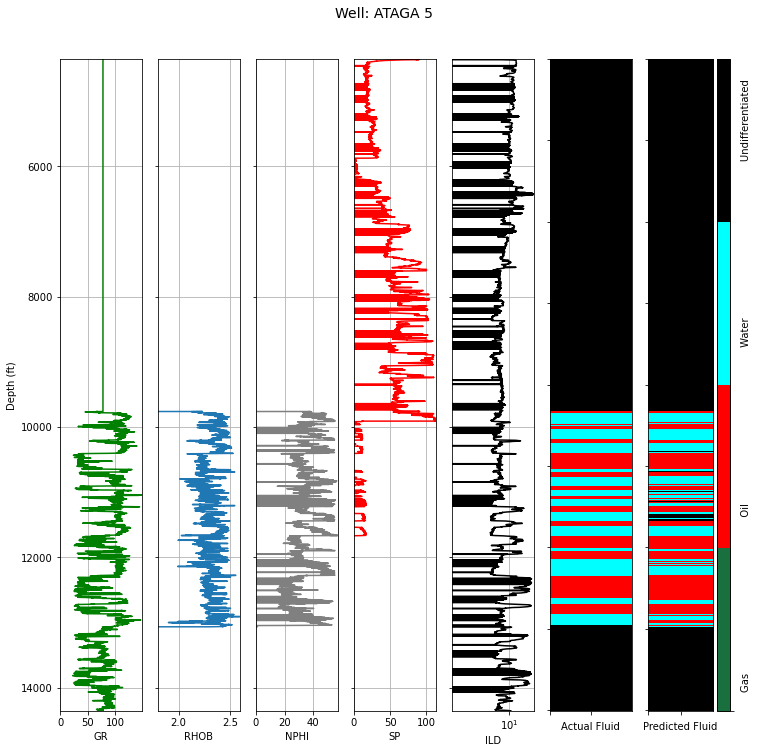

In [33]:
# make_facies_log_plot(test_df.loc[(test_df.index >= 13000) & (test_df.index <= 14200)], "GR", "RHOB", "NPHI", "SP", "ILD")
make_facies_log_plot(test_df, "GR", "RHOB", "NPHI", "SP", "ILD")

In [34]:
test_df.FLUIDTYPES.value_counts()/test_df.shape[0]

3.0    0.672295
2.0    0.174443
1.0    0.153262
Name: FLUIDTYPES, dtype: float64

In [35]:
test_df.Predicted_Fluid.value_counts()/test_df.shape[0]

3.0    0.690628
1.0    0.167249
2.0    0.142122
Name: Predicted_Fluid, dtype: float64

In [36]:
test_df.to_csv("../data/results/ataga_05_predicted_xgb.csv", index=False)

In [37]:
test_df = pd.read_csv("../data/results/ataga_05_predicted.csv")

0 = Gas
1 = Oil
2 = Water
3 = Undifferentiated zone